In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

/home/user/.pyenv/versions/3.7.8/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/user/.pyenv/versions/3.7.8/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/user/.pyenv/versions/3.7.8/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
from tensorflow.keras.utils import to_categorical

In [2]:
X = np.load('./mnist_data.npz')
T = np.load('./mnist_target.npz')

In [4]:
X = X['arr_0']
T = T['arr_0']

In [5]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3, stratify=T, random_state=1)

In [8]:
T_train = to_categorical(T_train)
T_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
X_train.shape

(49000, 784)

In [13]:
T_train.shape

(49000, 10)

In [14]:
model = Sequential()
model.add(Dense(input_dim=784, units=2000, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.02), metrics='accuracy')

In [17]:
result = model.fit(X_train, T_train, epochs=20, batch_size=1024)

Epoch 1/20
48/48 [==============================] - 3s 56ms/step - loss: 14626.9551 - accuracy: 0.1674
Epoch 2/20
48/48 [==============================] - 3s 52ms/step - loss: 1.8722 - accuracy: 0.4554
Epoch 3/20
48/48 [==============================] - 3s 55ms/step - loss: 2.3020 - accuracy: 0.4690
Epoch 4/20
48/48 [==============================] - 3s 55ms/step - loss: 1.1945 - accuracy: 0.6284
Epoch 5/20
48/48 [==============================] - 3s 55ms/step - loss: 0.9455 - accuracy: 0.7206
Epoch 6/20
48/48 [==============================] - 3s 56ms/step - loss: 1.4313 - accuracy: 0.5222
Epoch 7/20
48/48 [==============================] - 3s 56ms/step - loss: 1.1597 - accuracy: 0.6119
Epoch 8/20
48/48 [==============================] - 3s 57ms/step - loss: 1.0365 - accuracy: 0.6686
Epoch 9/20
48/48 [==============================] - 3s 58ms/step - loss: 1.0754 - accuracy: 0.6749
Epoch 10/20
48/48 [==============================] - 3s 58ms/step - loss: 0.9775 - accuracy: 0.7000
Epoch

In [21]:
result.history.keys()

dict_keys(['loss', 'accuracy'])

In [24]:
result.history['loss']

[7756.75634765625,
 1.6850441694259644,
 1.8076858520507812,
 1.1030594110488892,
 0.9748391509056091,
 1.4111003875732422,
 1.0866498947143555,
 1.0043630599975586,
 1.169468879699707,
 0.9048274755477905,
 0.8298661708831787,
 0.7381597757339478,
 0.7494398355484009,
 0.8319398164749146,
 0.8399221301078796,
 0.8026561737060547,
 1.0515992641448975,
 0.7560830116271973,
 0.6808692812919617,
 0.6633198857307434]

In [22]:
from matplotlib import pyplot as plt

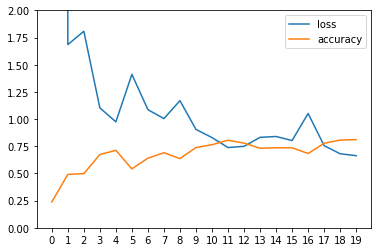

In [39]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['accuracy'], label='accuracy')
plt.ylim([0, 2])
plt.xticks(ticks=np.arange(20))
plt.legend()
plt.show()